##### Work in progress

# Jacksonville Single-Family Housing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('C:/Users/Robin/OneDrive/Documents/Python/DuvalSFR.csv')
# df.sale_date = df.sale_date.str.replace('-','')
#df.fillna(value=0, inplace=True)
df.shape

(272233, 96)

In [6]:
df.head()

,RE,mailing_address,mailing_city,mailing_state,property_use,subdivision,neighborhood,cap_base_yr,building_val,land_val,...,balcony,balcony_area,garage,garage_area,porch,porch_area,storage,storage_area,upperstory,avg_upperstory_area
0,000006 0030,2503 SUMMERFIELD LN,JACKSONVILLE,FL,100,SECTION LAND,417300.2,1995,196504,27300.0,...,NaN,NaN,1.0,1368.0,3.0,1100.0,1.0,720.0,NaN,NaN
1,000007 0010,PO BOX 23637,JACKSONVILLE,FL,100,SECTION LAND,417300.2,0,50003,22688.0,...,NaN,NaN,NaN,NaN,2.0,520.0,NaN,NaN,NaN,NaN
2,000009 0100,2495 U S 301 HWY N,BALDWIN,FL,100,SECTION LAND,417300.2,1995,98153,65625.0,...,NaN,NaN,NaN,NaN,2.0,94.0,NaN,NaN,NaN,NaN
3,000011 0000,2425 US HWY 301 N,BALDWIN,FL,100,SECTION LAND,417300.2,0,74226,21625.0,...,NaN,NaN,NaN,NaN,1.0,147.0,NaN,NaN,NaN,NaN
4,000012 0010,2204 US HIGHWAY 301 N,JACKSONVILLE,FL,100,SECTION LAND,417300.2,1995,92290,16375.0,...,NaN,NaN,NaN,NaN,1.0,30.0,NaN,NaN,NaN,NaN


In [43]:
sales = df[~df.sale_date.isnull()]
sales = sales[~sales.sale_date.str.contains('M')]
sales.sale_date = sales.sale_date.astype('datetime64[ns, US/Eastern]')

## Market Overview

### Sales and Inventory

In [88]:
print("There are", str(len(df.RE.unique()))[:3]+','+str(len(df.RE.unique()))[-3:], 
      "single-family homes in Jacksonville. The average home is worth", 
      "$"+str(int(np.mean(df.just_val)))[:-3]+','+str(int(np.mean(df.just_val)))[-3:], 
      "and spans", str(int(np.mean(df.heated_sf)))[:-3]+','+str(int(np.mean(df.heated_sf)))[-3:]+" square feet.\n")
print("From January 1, 2018 through", 
     sales[sales.sale_date == max(sales.sale_date)].sale_date.dt.month_name(locale='English').to_list()[0], 
     str(max(sales.sale_date).day)+",",max(sales.sale_date).year, 
     "there were", str(len(df[df.price>0].price))[:-3]+","+str(len(df[df.price>0].price))[-3:],
     "sales of single-family homes, generating a total of $"\
     +str(round(np.sum(df.price)/1000000000,2))+" billion.",
     "The average home sold for", "$"+str(int(np.mean(sales.price)))[:-3]+","+str(int(np.mean(sales.price)))[-3:]+",", "or",
      "$"+str(int(np.mean(sales.price)/np.mean(sales.heated_sf)))+" per square foot.")

There are 269,302 single-family homes in Jacksonville. The average home is worth $194,409 and spans 1,761 square feet.

From January 1, 2018 through August 18, 2020 there were 40,466 sales of single-family homes, generating a total of $9.88 billion. The average home sold for $244,077, or $133 per square foot.


### Construction

Home construction started along the St. Johns River and along the ocean. It has continued further and further inland over time. 

Construction soared during the housing boom of the 2000s, hitting an all-time high of more than 47,000 homes built that decade. The pace of construction then plummeted starting in 2006, bottoming out at about 1,000 homes built in 2011 - a seventh of what was built in 2006.  

Construction has picked up every year since 2011, but more gradually than what the area experienced during the boom years. About 4,250 homes were built last year.

<div>
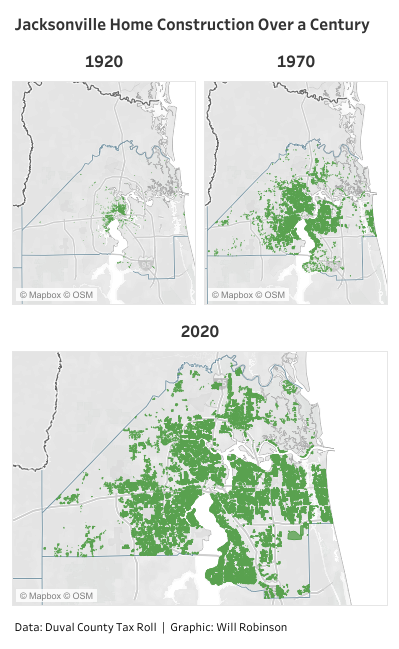
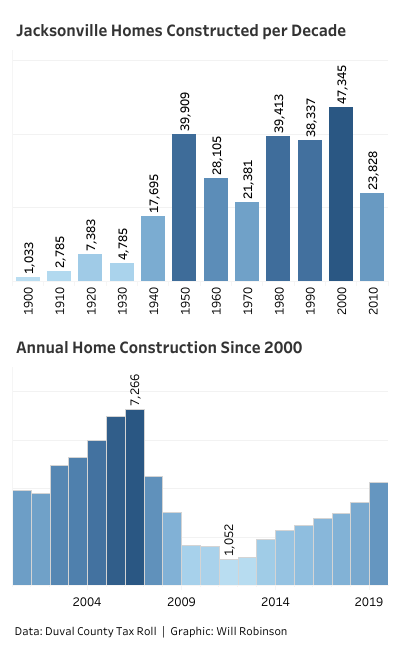
</div>


In [23]:
df.dtypes

RE                      object
mailing_address         object
mailing_city            object
mailing_state           object
property_use             int64
                        ...   
porch_area             float64
storage                float64
storage_area           float64
upperstory             float64
avg_upperstory_area    float64
Length: 96, dtype: object

In [22]:
df = df.astype(
    {
    'RE':'str'    
    }
    )

object
RE None

object
mailing_address None

object
mailing_city None

object
mailing_state None

int64
property_use None

object
subdivision None

float64
neighborhood None

int64
cap_base_yr None

int64
building_val None

float64
land_val None

float64
feature_val None

int64
just_val None

int64
market_val None

int64
assessed_val None

int64
school_exempt None

int64
county_exempt None

int64
sjrwnd_exempt None

object
taxing_district None

int64
lot_size None

int64
heated_sf None

object
char_descr None

object
type_descr None

int64
style None

int64
class None

float64
quality None

int64
actual_yr_built None

int64
effec_yr_built None

float64
perc_complete None

float64
stories None

float64
bedrooms None

float64
baths None

float64
rooms None

object
owner None

object
trans_id None

object
sale_date None

object
seller None

object
buyer None

float64
price None

object
site_address None

float64
zipcode None

float64
boatcv None

float64
boatcv_units None

float64
boatcv_

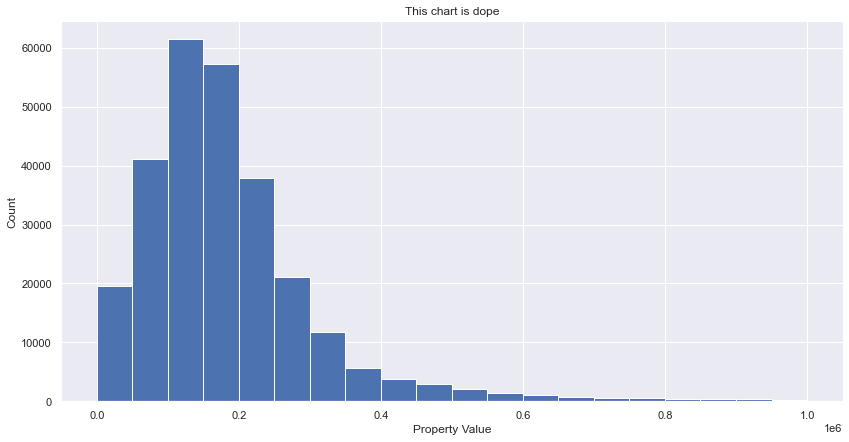

In [10]:
sns.set()
plt.figure(figsize=(14,7))
_ = plt.hist(df['just_val'], bins=20, range=(0,1000000), color='b')
_ = plt.xlabel('Property Value')
_ = plt.ylabel('Count')
_ = plt.title('This chart is dope')

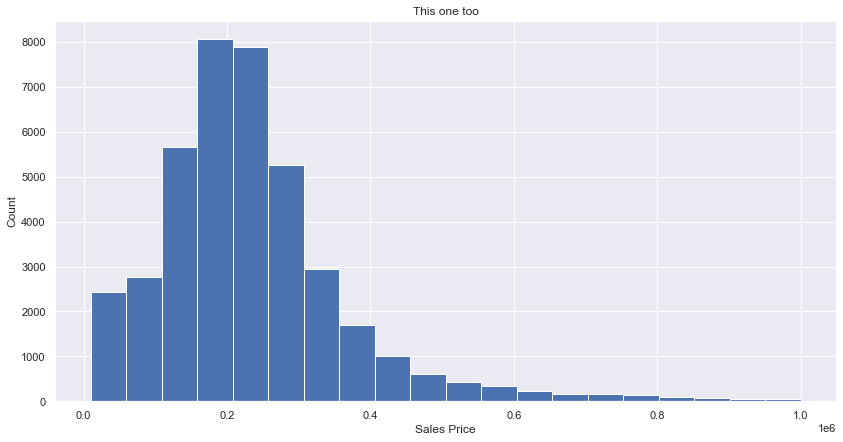

In [13]:
sns.set()
plt.figure(figsize=(14,7))
_ = plt.hist(df['price'], bins=20, range=(10000,1000000), color='b')
_ = plt.xlabel('Sales Price')
_ = plt.ylabel('Count')
_ = plt.title('This one too')

In [36]:
pd.DataFrame(df.mailing_state.value_counts())

,mailing_state
FL,255168
CA,4279
TX,2152
AZ,1431
GA,1384
NY,831
VA,698
NC,605
NJ,489
DE,372


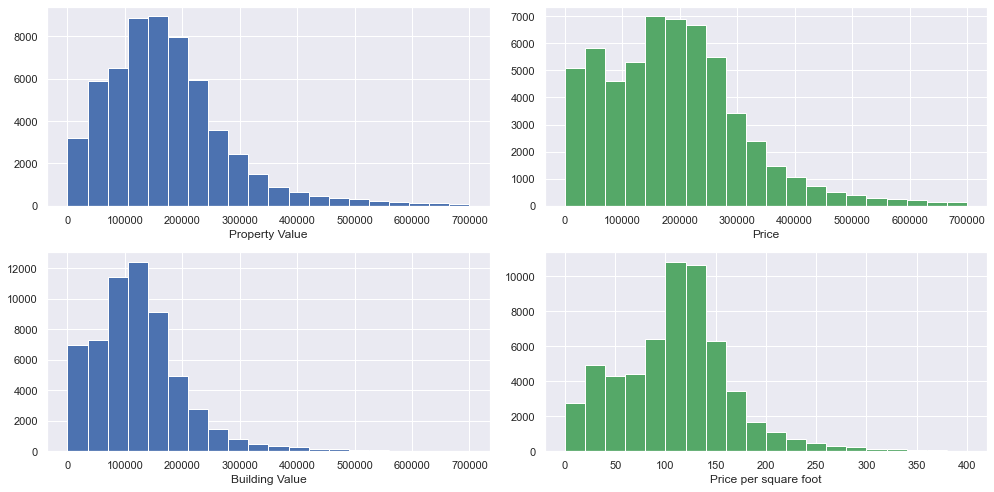

In [5]:
sns.set()
plt.figure(figsize=(14,7))
_ = plt.subplot(2,2,1)
_ = plt.hist(df['property_value'], bins=20, range=(0,700000), color='b')
_ = plt.xlabel('Property Value')
_ = plt.subplot(2,2,2)
_ = plt.hist(df['eff_price'], bins=20, range=(0,700000), color='g')
_ = plt.xlabel('Price')
_ = plt.subplot(2,2,3)
_ = plt.hist(df['bldng_value'], bins=20, range=(0,700000), color='b')
_ = plt.xlabel('Building Value')
_ = plt.subplot(2,2,4)
_ = plt.hist(df['ppsf'], bins=20, range=(0,400), color='g')
_ = plt.xlabel('Price per square foot')
plt.tight_layout()

In [6]:
df.columns

Index(['RE', 'mailing_address', 'mailing_city', 'mailing_state',
       'property_use', 'subdivision', 'neighborhood', 'property_value',
       'county_taxable', 'lot_size', 'building', 'type_descr', 'style',
       'class', 'quality', 'yr_built', 'bldng_value', 'heated_sf', 'trans_id',
       'sale_date', 'trans_price', 'parcel_count', 'ppsf', 'eff_price',
       'baths', 'bedrooms', 'rooms', 'stories', 'cov_patio',
       'covpatio_avg_grade', 'covpatio_avg_ppu', 'covpatio_avg_yr_built',
       'covpatio_total_depreciated', 'deck_ft', 'deckft_avg_grade',
       'deckft_avg_ppu', 'deckft_avg_yr_built', 'deckft_total_depreciated',
       'fireplace', 'fireplace_avg_grade', 'fireplace_avg_ppu',
       'fireplace_avg_yr_built', 'fireplace_total_depreciated', 'pool',
       'pool_avg_grade', 'pool_avg_ppu', 'pool_avg_yr_built',
       'pool_total_depreciated', 'additions', 'addition_area',
       'addition_effec', 'addition_heated', 'carports', 'carport_area',
       'carport_effec', 'gar

In [10]:
reduced = df[['subdivision','neighborhood','mailing_address', 'mailing_state', 'bedrooms','baths','rooms','stories',
             'property_value','county_taxable','type_descr','style','class','quality',
             'yr_built','heated_sf','sale_date','eff_price','cov_patio','deck_ft','fireplace',
             'pool','additions','carports','garages','porches','storages','upper_stories','ppsf']]
reduced.shape

(58983, 29)

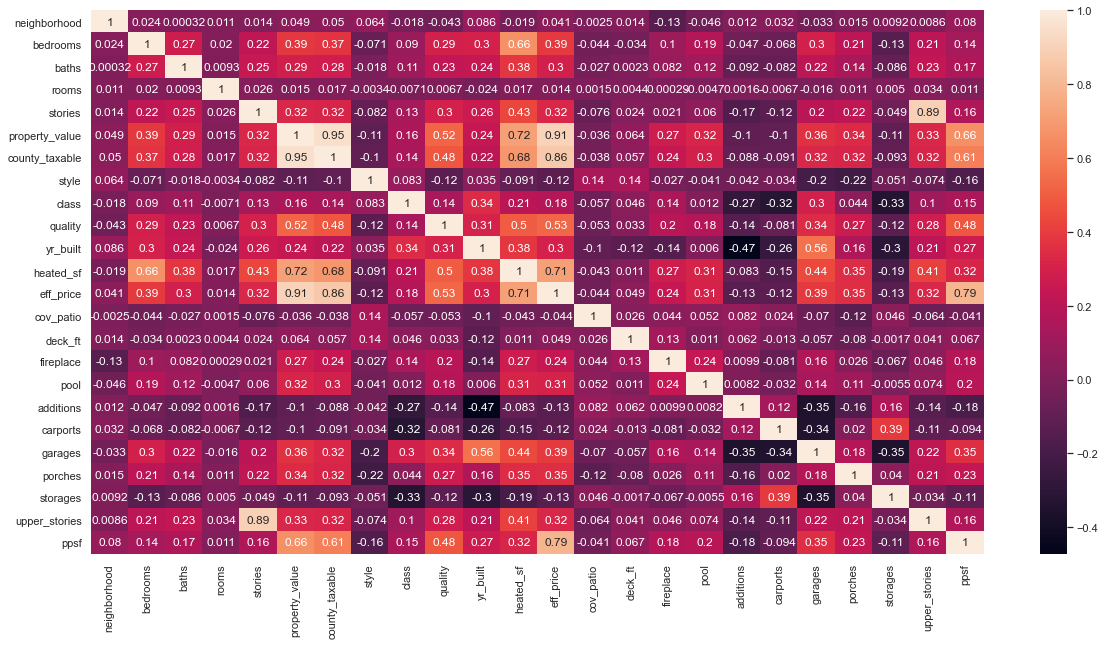

In [11]:
plt.figure(figsize=(20,10))
im = sns.heatmap(reduced.corr(), annot=True)

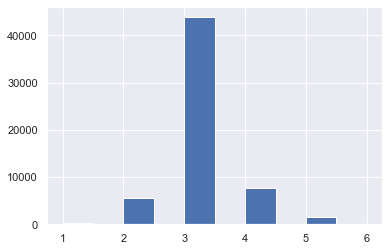

In [12]:
_ = plt.hist(df['quality'])

In [13]:
df.baths.value_counts()

2.0      30291
1.0       9809
2.5       8596
3.0       4988
1.5       2243
3.5       1509
4.0        925
4.5        341
5.0        141
5.5         66
6.5         27
6.0         26
7.0          9
8.0          4
7.5          3
2.4          1
324.0        1
10.0         1
20.0         1
8.5          1
Name: baths, dtype: int64

In [14]:
df = df[df['baths']<10]
df.baths.value_counts()

2.0    30291
1.0     9809
2.5     8596
3.0     4988
1.5     2243
3.5     1509
4.0      925
4.5      341
5.0      141
5.5       66
6.5       27
6.0       26
7.0        9
8.0        4
7.5        3
2.4        1
8.5        1
Name: baths, dtype: int64

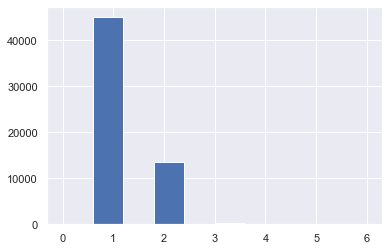

In [15]:
_ = plt.hist(df.stories)

In [55]:
type(df.mailing_address.value_counts())

pandas.core.series.Series

In [16]:
investors = pd.DataFrame(df.mailing_address.value_counts()).reset_index()
investors.rename(columns={'index':'address','mailing_address':'homes'},inplace=True)
investors = investors[investors.homes >= 10]
investors

,address,homes
0,5001 PLAZA ON THE LAKE STE 200,746
1,P O BOX 4090,422
2,3721 DUPONT STATION CT,262
3,7563 PHILIPS HWY SUITE 208,237
4,1850 PARKWAY PL STE 900,201
...,...,...
125,6660 HARLOW BLVD,10
126,1013 CENTRE RD STE 403 A,10
127,5220 SHAD RD STE 202,10
128,259 LIGHTHOUSE VIEW DR,10


In [17]:
jwb = []
for address in investors.address:
    if ('7563 PHILIPS' and '208') in address:
        print(address)
        jwb.append(address)

7563 PHILIPS HWY SUITE 208
7563 PHILIPS HWY STE 208
7563 PHILIPS HWY BLDG 100 STE 208


In [18]:
jwb_df = pd.DataFrame()
for address in jwb:
    jwb_df = jwb_df.append(investors[investors.address == address])
jwb_df

,address,homes
3,7563 PHILIPS HWY SUITE 208,237
5,7563 PHILIPS HWY STE 208,180
42,7563 PHILIPS HWY BLDG 100 STE 208,23


In [19]:
jwb_df = pd.DataFrame()
for address in jwb:
    jwb_df = jwb_df.append(df[df.mailing_address == address])
jwb_df

,RE,mailing_address,mailing_city,mailing_state,property_use,subdivision,neighborhood,property_value,county_taxable,lot_size,...,porch_screened,porch_unfinished,storages,storage_area,storage_effec,storage_unfinished,upper_stories,upper_story_area,upper_story_effec,upper_story_heated
606,0020601665R,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,ADAMS LAKE UNIT 02,413721.22,171695,171695,8684,...,0,0,0,0,0,0,0,0,0,0
941,0020610510R,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,OLD GAINESVILLE ESTATES,413721.32,164601,164601,9055,...,0,0,0,0,0,0,0,0,0,0
2924,0074661220R,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,BENT TREE,512000.25,93518,93518,3277,...,0,0,0,0,0,0,1,975,926,975
2933,0074661270R,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,BENT TREE,512000.25,92088,92088,2177,...,0,0,0,0,0,0,1,927,881,927
3903,0090623300R,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,PINECREST,511902.37,202818,202818,17504,...,0,0,0,0,0,0,1,1634,1552,1634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31886,1148050000R,7563 PHILIPS HWY BLDG 100 STE 208,JACKSONVILLE,FL,100,CAMPBELLS ADDN TO JAX,117400.21,20164,20164,3675,...,0,0,0,0,0,0,0,0,0,0
33336,1226190010R,7563 PHILIPS HWY BLDG 100 STE 208,JACKSONVILLE,FL,100,OAKLAND,117400.22,5769,5769,1371,...,0,0,0,0,0,0,0,0,0,0
33355,1229520000R,7563 PHILIPS HWY BLDG 100 STE 208,JACKSONVILLE,FL,100,HULINGS S/D TRACT 05 OAK,117400.22,5871,5871,2958,...,0,0,0,0,0,0,0,0,0,0
36869,1444990000R,7563 PHILIPS HWY BLDG 100 STE 208,JACKSONVILLE,FL,100,OAKWOOD VILLA ESTATES,215502.21,53820,43600,10617,...,0,0,0,0,0,0,0,0,0,0


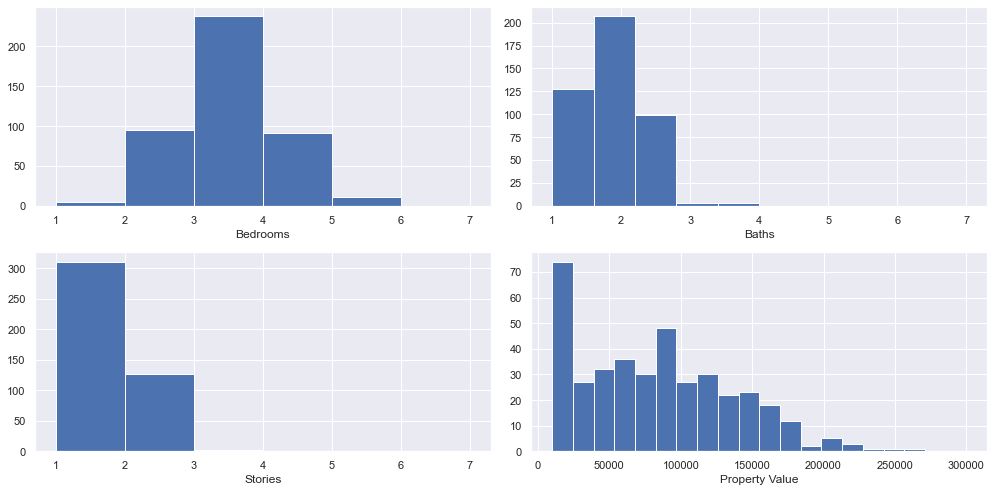

In [21]:
plt.figure(figsize=(14,7))
_ = plt.subplot(2,2,1)
_ = plt.hist(jwb_df['bedrooms'], bins=6, range=(1,7), color='b')
_ = plt.xlabel('Bedrooms')
_ = plt.subplot(2,2,2)
_ = plt.hist(jwb_df['baths'], bins=10, range=(1,7), color='b')
_ = plt.xlabel('Baths')
_ = plt.subplot(2,2,3)
_ = plt.hist(jwb_df['stories'], bins=6, range=(1,7), color='b')
_ = plt.xlabel('Stories')
_ = plt.subplot(2,2,4)
_ = plt.hist(jwb_df['property_value'], bins=20, range=(10000,300000), color='b')
_ = plt.xlabel('Property Value')
plt.tight_layout()

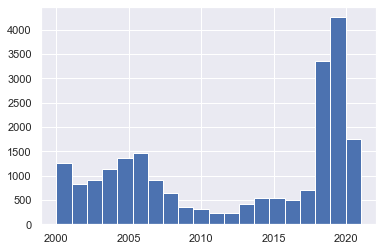

In [30]:
_ = plt.hist(df['yr_built'], bins=20, range=(2000,2021))

In [39]:
year_built = pd.DataFrame(df['yr_built'].value_counts())

In [40]:
year_built.T

,2019,2018,2020,2006,2005,2004,1960,1959,1955,1986,...,1902,1898,1894,1897,1900,1854,1890,1889,1865,1888
yr_built,4254,3349,1744,1463,1359,1130,1068,1059,1034,1033,...,3,2,2,2,2,1,1,1,1,1
